# Curvas elípticas sobre los números reales

Código original: <https://github.com/fangpenlin/elliptic-curve-explained>. Licencia MIT.

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180

Vamos a utilizar la curva: $y^2 = x^3 + Ax + B$

Los valores de A y B están aquí abajo, puedes jugar con ellos.

Valores originales, para empezar con una curva común: $A=-3$ y $B=5$

Observaciones (para que puedas representarlas, no tienen importancia): aumentar A "cierra la curva" mientras que aumentar B "la hace más grande"

Nota: puede pasar que, al representar, el punto se vaya al "punto del infinito": significa que la recta es una paralela a la anterior. Eso es una solución válida, pero este código de ejemplo no lo contempla. Si te sucede, cambia el punto inicial para que la suma no se vaya al infinito.

In [7]:
import numpy as np

A = -10
B = 5

def y_value(a, b, x):
    """Get positive y value of the curve given x"""
    return pow(pow(x, 3) + x * a + b, 0.5)

class Point:
    def __init__(self, x=float('inf'), y=float('inf')):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return "Point({}, {})".format(self.x, self.y)
    
    def __add__(self, other):
        assert type(other) is Point
        if self.x == other.x and self.y == other.y:
            return self.double()
        dx = other.x - self.x
        dy = other.y - self.y
        if dx == 0:
            return Point()
        slope = dy / dx
        x = (slope ** 2) - self.x - other.x
        y = slope * x + (self.y - slope * self.x)
        return Point(x, -y)
    
    def double(self):
        slope = (3 * (self.x ** 2) + A) / (2 * self.y)
        x = (slope ** 2) - (2 * self.x)
        y = slope * x + (self.y - slope * self.x)
        return Point(x, -y)
    
    def oppsite(self):
        return Point(self.x, -self.y)
    
    def np(self):
        return np.array([self.x, self.y])
    

In [8]:
import matplotlib.pyplot as plt

def plot_ec():
    y, x = np.ogrid[-5:5:100j, -5:5:100j]
    z = pow(y, 2) - pow(x, 3) - x * A - B

    plt.contour(x.ravel(), y.ravel(), z, [0])
    plt.axhline(y=0, color='r')
    plt.axvline(x=0, color='b')


def plot_distinct_point_curve(p0, p1, p0_annotation, p1_annotation, third_point_annotation, sum_point_annotation):
    plot_ec()
    
    p2 = p0 + p1

    line0 = np.array([
        p0.np(),
        p2.oppsite().np(),
        p1.np()
    ])
    plt.plot(line0[:,0], line0[:,1], marker='o')
    plt.annotate(p0_annotation, xy=line0[0], xytext=(-5, 5), textcoords='offset points')
    plt.annotate(p1_annotation, xy=line0[2], xytext=(-5, 5), textcoords='offset points')
    plt.annotate(third_point_annotation, xy=line0[1], xytext=(-5, 5), textcoords='offset points')

    line1 = np.array([
        p2.oppsite().np(),
        p2.np()
    ])
    plt.plot(line1[:,0], line1[:,1], marker='o')
    plt.annotate(sum_point_annotation, xy=line1[1], xytext=(0, 5), textcoords='offset points')

    plt.grid()
    plt.show()
    

def plot_double_point_curve(p, p_annotation, sum_point_annotation):
    plot_ec()
    
    p2 = p.double()

    line0 = np.array([
        p.np(),
        p2.oppsite().np(),
    ])
    plt.plot(line0[:,0], line0[:,1], marker='o')
    plt.annotate(p_annotation, xy=line0[0], xytext=(-5, 5), textcoords='offset points')

    line1 = np.array([
        p2.oppsite().np(),
        p2.np()
    ])
    plt.plot(line1[:,0], line1[:,1], marker='o')
    plt.annotate(sum_point_annotation, xy=line1[1], xytext=(0, 5), textcoords='offset points')

    plt.grid()
    plt.show()
    

def plot_n_point_curve(p, n, p_annotation, sum_point_annotation):
    plot_ec()
    
    current_p = p
    for _ in range(n):
        current_p += p

    line0 = np.array([
        p.np(),
        current_p.np(),
    ])
    plt.plot(line0[:,0], line0[:,1], linestyle='--', marker='o')
    plt.annotate(p_annotation, xy=line0[0], xytext=(-5, 5), textcoords='offset points')
    plt.annotate(sum_point_annotation, xy=line0[1], xytext=(-5, 5), textcoords='offset points')

    plt.grid()
    plt.show()

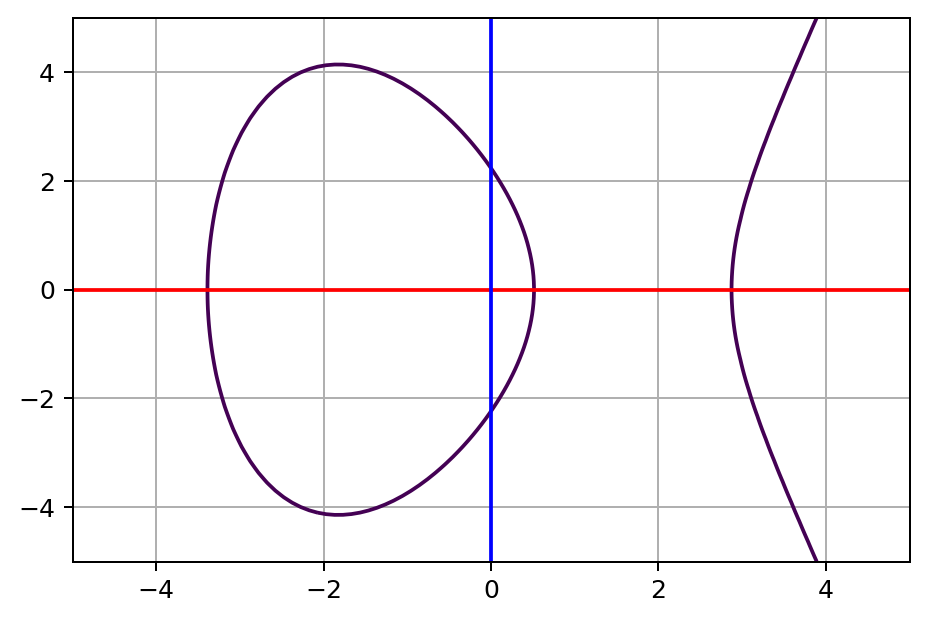

In [9]:
plot_ec()
plt.grid()
plt.show()

## Empezando por dos puntos diferentes

In [10]:
a = Point(-2.1, y_value(A, B, -2.1))
b = Point(0.2, y_value(A, B, 0.2))
c = Point(-2.2, y_value(A, B, -2.2))

ab = a + b
bc = b + c

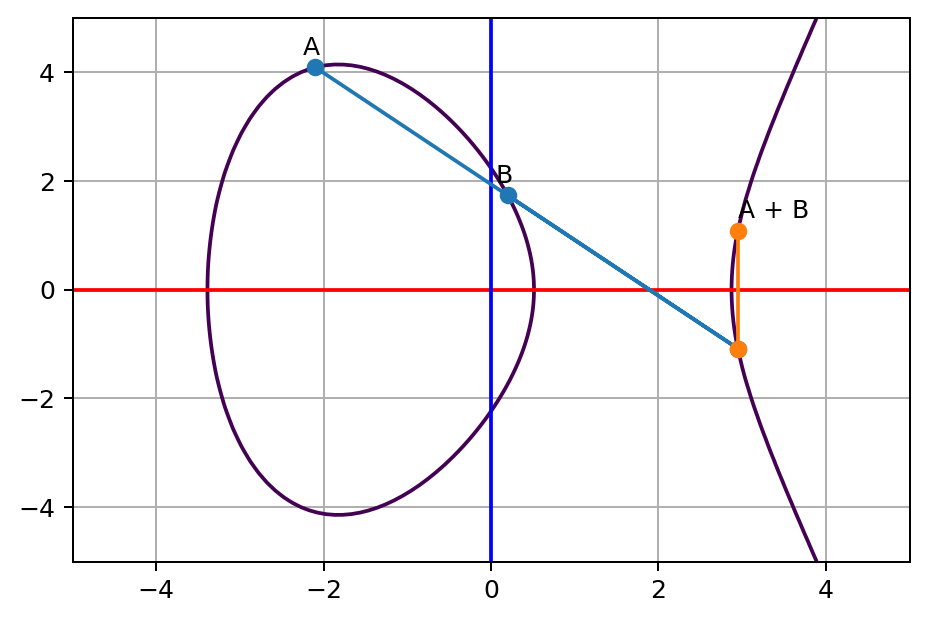

In [11]:
plot_distinct_point_curve(
    a, b,
    'A', 'B', '', 'A + B'
)

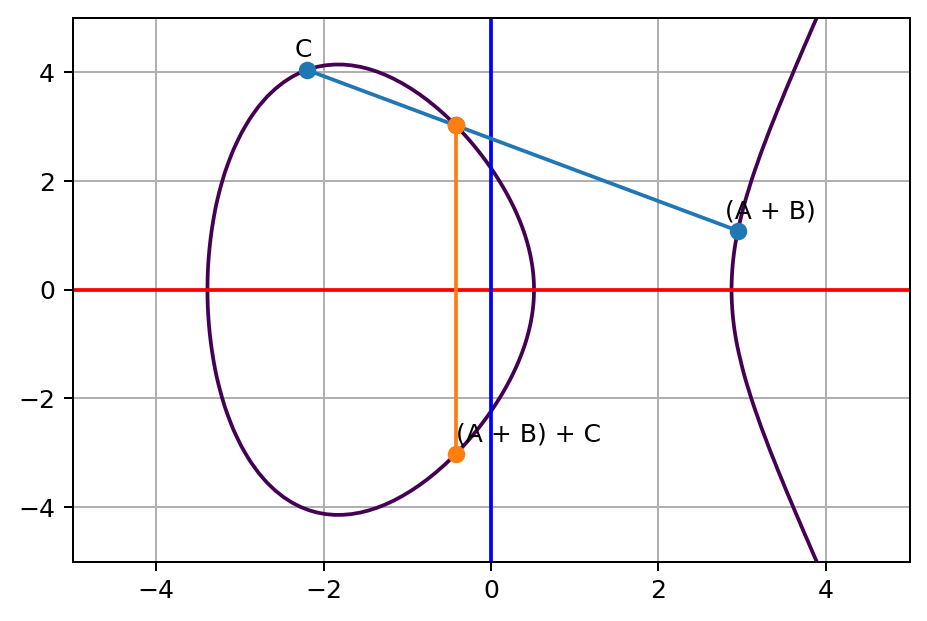

In [12]:
plot_distinct_point_curve(
    ab, c,
    '(A + B)', 'C', '', '(A + B) + C'
)

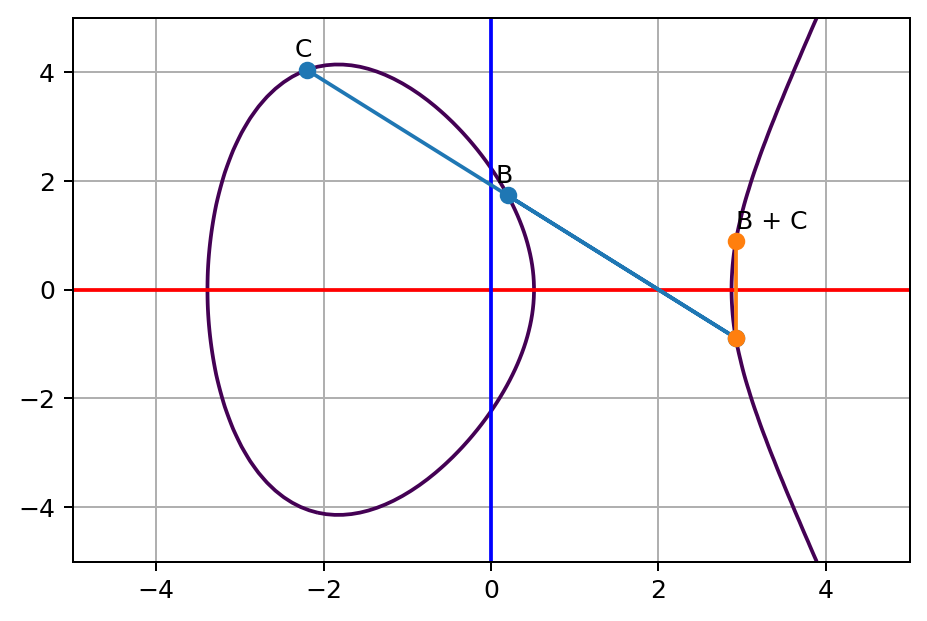

In [13]:
plot_distinct_point_curve(
    b, c,
    'B', 'C', '', 'B + C'
)

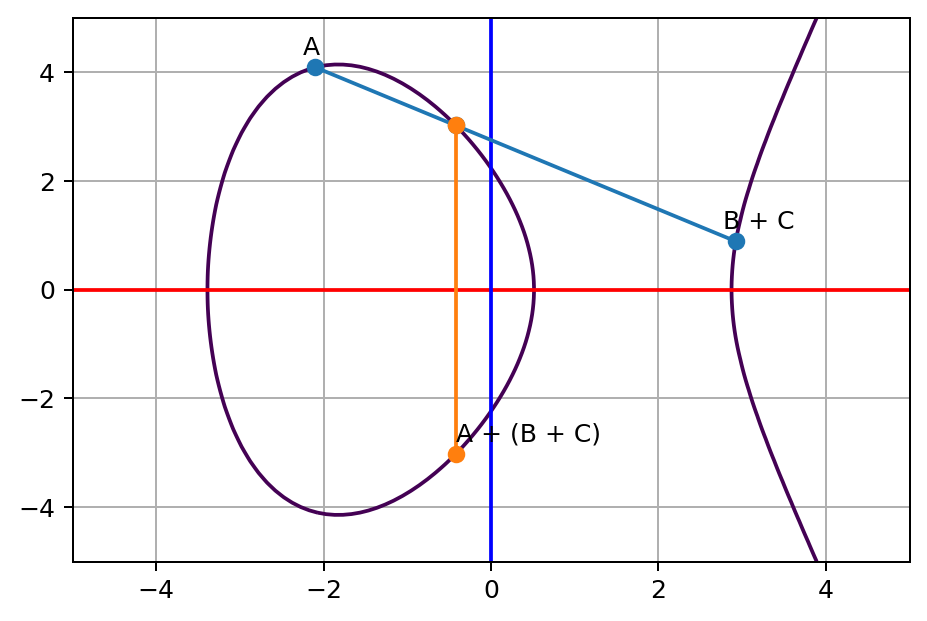

In [14]:
plot_distinct_point_curve(
    a, bc,
    'A', 'B + C', '', 'A + (B + C)'
)

In [15]:
ab_c = ab + c
a_bc = a + bc
(ab_c, a_bc)

(Point(-0.4198659199082191, -3.020702258021727),
 Point(-0.4198659199082204, -3.0207022580217284))

## Empezando por un punto P

La recta inicial es la tangente a la curva. El resto es igual que antes

In [16]:
p = Point(-0.9, y_value(A, B, -0.9))

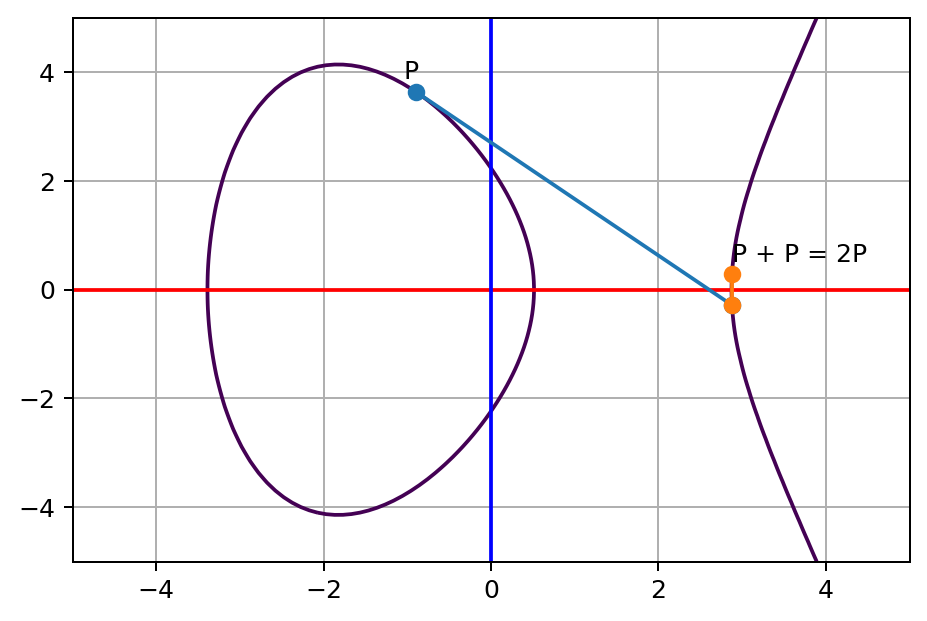

In [17]:
plot_double_point_curve(p, "P", "P + P = 2P")

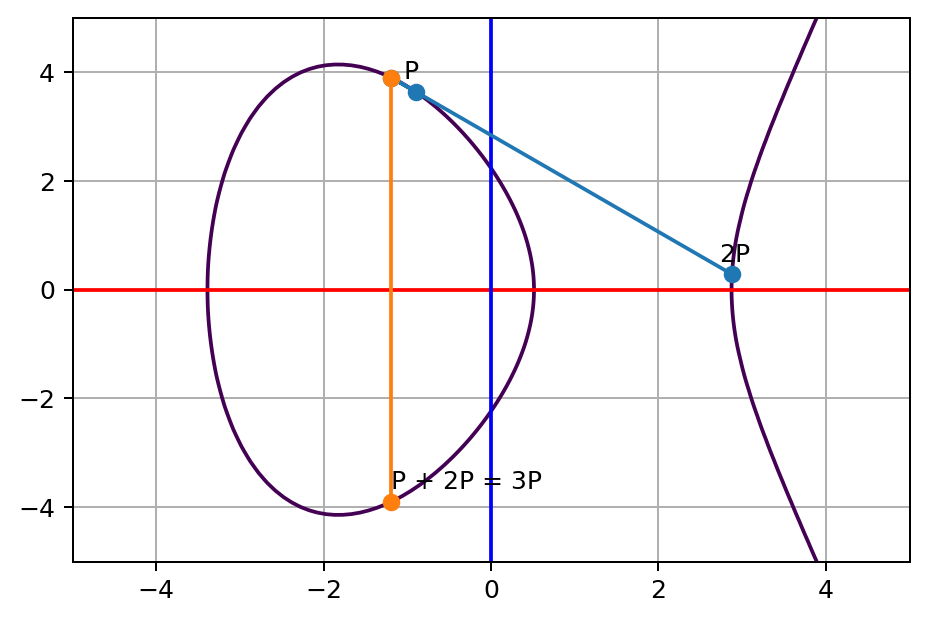

In [18]:
p2 = p.double()
plot_distinct_point_curve(
    p, p2,
    'P', '2P', '', 'P + 2P = 3P'
)

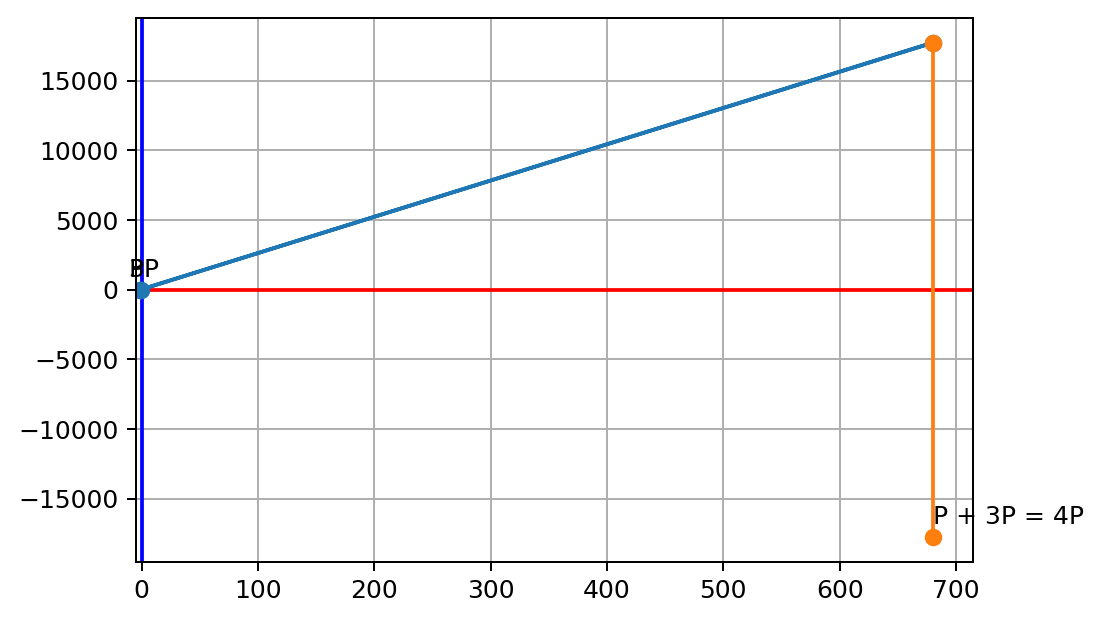

In [19]:
p3 = p.double() + p
plot_distinct_point_curve(
    p, p3,
    'P', '3P', '', 'P + 3P = 4P'
)

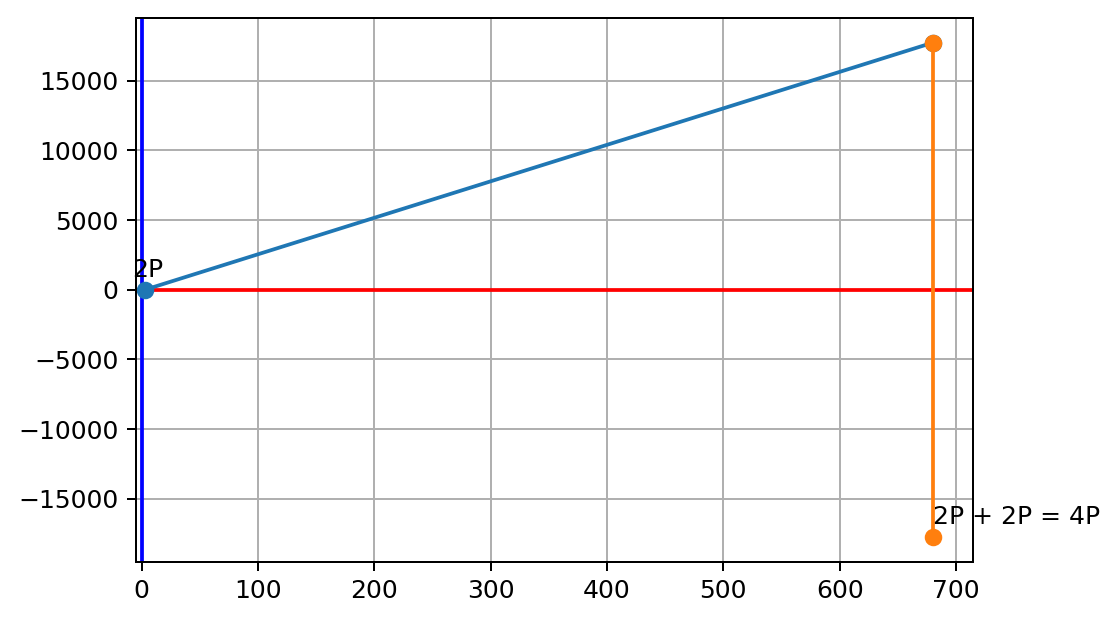

In [20]:
plot_double_point_curve(
    p2,
    '2P', '2P + 2P = 4P'
)

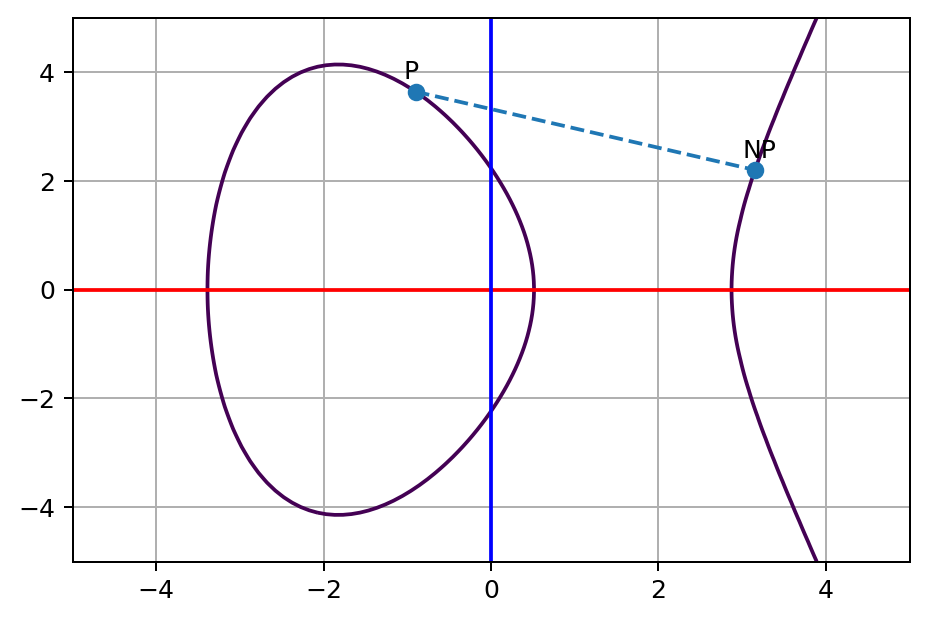

In [21]:
plot_n_point_curve(
    p, 13,
    'P', 'NP'
)